# Practical 3: CIFAR-10

This is the second task of Practical 3. Your task is to use **transfer learning** to build a convolutional neural network to tackle the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). 
You could select an existing trained model (VGG16 excluded) from Keras (https://keras.io/api/applications/) and fine-tune it to build a classifier for CIFAR-10.

We will grade your code based on the accuracy of your model. 
Your CNN should achieve at least an accuracy of 75% to pass the practical.
You can get 5 bonus points by achieving an accuracy of 85%+.


The model files might be too large to be uploaded to GitHub. 
Please use the following link to upload your models: https://seafile.ifi.uzh.ch/u/d/695f63e725b641ed8633/

Name the model file `{repository_name}-CIFAR10.h5`. For example, if your repository is FDS22-M0, you should name the model file `FDS22-M0-CIFAR10.h5`. If you are not satisfied with the model you have uploaded, you can upload a new one with the same name. We will only look at the newest model. Nevertheless, try to upload as few times as possible, since the online drive has a limited amount of space. 

## Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Model
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

In [ ]:
tf.__version__

'2.10.1'

In [ ]:
tf.keras.__version__

'2.10.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as apply the preprocess function of your selected model and perform data augmentation. 

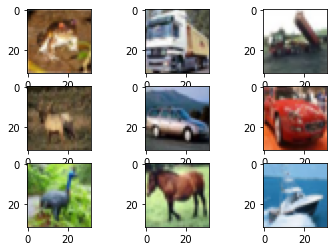

(50000, 32, 32, 3)

In [ ]:
from keras.datasets import cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

## Data preparation

In [ ]:
X_train_full = X_train_full.astype('float32')


# vgg16 preprocess
X_train_full = preprocess_input(X_train_full)
X_test = preprocess_input(X_test)

# one-hot encoding
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# get validation dataset
np.random.seed(42)  # we set the random seed to make sure everytime the data is shuffled in the same way
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

## Build and train the model

Build and train your model.

In [ ]:
VGG19=tf.keras.applications.vgg19.VGG19(include_top=False,input_shape=(32, 32, 3))
VGG19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
#setting
batch_size=64
epoch=50

# TODO: load the model you selected
VGG19 = tf.keras.applications.vgg19.VGG19(include_top=False, input_shape=(32, 32, 3), weights='imagenet')
VGG19.trainable=False



def makeModel():
    y=VGG19.layers[-16].output
    y = Convolution2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
    y = Convolution2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
    y=BatchNormalization()(y)
    y=Dropout(0.3)(y)
    y = MaxPooling2D(pool_size=2, strides=2, padding='same')(y)
    y = Convolution2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
    y = Convolution2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
    y=BatchNormalization()(y)
    y=Dropout(0.4)(y)
    y = MaxPooling2D(pool_size=2, strides=2, padding='same')(y)
    y = Flatten()(y)
    y = Dense(units=10, activation='softmax', kernel_initializer='he_normal')(y)
    model = keras.Model(inputs=VGG19.input, outputs=y)
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# TODO: Transfer learning - build your own model based on the selected model
aug = ImageDataGenerator(width_shift_range = 0.125, height_shift_range = 0.125, horizontal_flip = True)
aug.fit(X_train)
gen = aug.flow(X_train, y_train, batch_size=batch_size)
model=makeModel()
history1=model.fit_generator(generator=gen, epochs=epoch, validation_data=(X_valid, y_valid))
VGG19.trainable=True
history2=model.fit_generator(generator=gen, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/50


C:\Users\wzy\AppData\Local\Temp\ipykernel_4408\1950590897.py:37: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1=model.fit_generator(generator=gen, epochs=epoch, validation_data=(X_valid, y_valid))


704/704 [==============================] - 14s 19ms/step - loss: 1.3887 - accuracy: 0.5509 - val_loss: 1.2780 - val_accuracy: 0.5618
Epoch 2/50
704/704 [==============================] - 13s 19ms/step - loss: 0.9743 - accuracy: 0.6685 - val_loss: 1.1004 - val_accuracy: 0.6332
Epoch 3/50
704/704 [==============================] - 13s 19ms/step - loss: 0.8050 - accuracy: 0.7246 - val_loss: 0.8010 - val_accuracy: 0.7274
Epoch 4/50
704/704 [==============================] - 13s 19ms/step - loss: 0.7194 - accuracy: 0.7559 - val_loss: 1.0975 - val_accuracy: 0.7506
Epoch 5/50
704/704 [==============================] - 13s 19ms/step - loss: 0.6636 - accuracy: 0.7736 - val_loss: 0.7140 - val_accuracy: 0.7822
Epoch 6/50
704/704 [==============================] - 13s 19ms/step - loss: 0.6400 - accuracy: 0.7799 - val_loss: 0.6413 - val_accuracy: 0.7932
Epoch 7/50
704/704 [==============================] - 13s 19ms/step - loss: 0.5842 - accuracy: 0.8023 - val_loss: 0.6397 - val_accuracy: 0.7902
Epo

C:\Users\wzy\AppData\Local\Temp\ipykernel_4408\1950590897.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2=model.fit_generator(generator=gen, epochs=20, validation_data=(X_valid, y_valid))


704/704 [==============================] - 13s 19ms/step - loss: 0.1391 - accuracy: 0.9518 - val_loss: 0.8733 - val_accuracy: 0.8444
Epoch 2/20
704/704 [==============================] - 13s 19ms/step - loss: 0.1357 - accuracy: 0.9526 - val_loss: 0.6379 - val_accuracy: 0.8736
Epoch 3/20
704/704 [==============================] - 13s 19ms/step - loss: 0.1397 - accuracy: 0.9503 - val_loss: 0.5591 - val_accuracy: 0.8866
Epoch 4/20
704/704 [==============================] - 13s 19ms/step - loss: 0.1341 - accuracy: 0.9529 - val_loss: 0.5329 - val_accuracy: 0.8822
Epoch 5/20
704/704 [==============================] - 13s 19ms/step - loss: 0.1280 - accuracy: 0.9549 - val_loss: 0.7159 - val_accuracy: 0.8620
Epoch 6/20
704/704 [==============================] - 14s 19ms/step - loss: 0.1262 - accuracy: 0.9554 - val_loss: 0.7020 - val_accuracy: 0.8610
Epoch 7/20
704/704 [==============================] - 13s 19ms/step - loss: 0.1300 - accuracy: 0.9552 - val_loss: 0.6240 - val_accuracy: 0.8708
Epo

In [ ]:
# show the structure of your model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

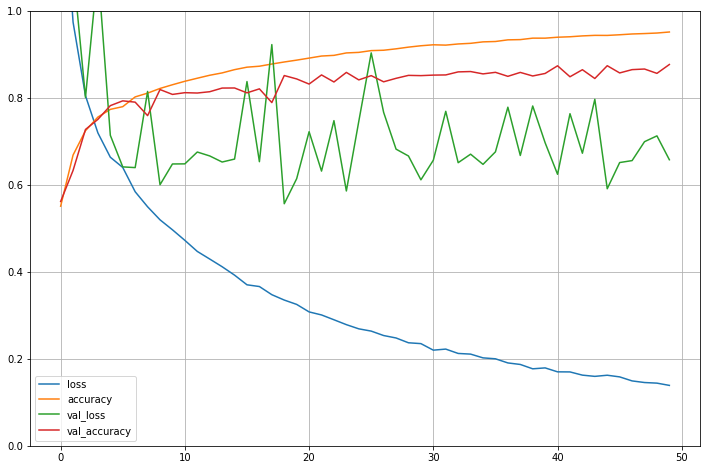

In [ ]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history1.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

Save and upload your trained model to the **Seafile link** we provided to you. You can upload it multiple times. We will consider only the newest uploaded model. 

In [ ]:
model.save_weights('FDS22-M123-CIFAR10.h5') # change the file name according to your repository name

## Load the model and evaluate it on the test data

In [ ]:
model = makeModel()
model.build(input_shape =(1,32,32,3))
model.load_weights('FDS22-M123-CIFAR10.h5')
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7419 - accuracy: 0.8616


[0.7418617010116577, 0.8615999817848206]

## Short report

In this task, since I must have to use transfer learning, I decided to build my model based on vgg19. However, after testing a lot and searching on Internet, I found that dropout and BatchNorm can greatly increase the acc rate.
Since the VGG19 backbone do not provide those two components, I only use the first two convolution blocks in vgg19. After that, I add two convolution blocks including dropout and BatchNorm.
Besides, data augment is added into training session as well. Without data augment, the model can only reach about 84% acc rate, only a little away from 85%. After integrating data augment part, the acc rate raises up to 86.49%.
The only problem is the training epochs. In former task, only 10 rounds can get good result. But in this task, I have to train about 50 rounds to get satisfying result.
Due to that reason, I used GPU to accelerate. It takes about 30 min to get 50 rounds training. However, from the plot, it seems the model has not converged yet. I stopped training because it has met the 85% requirement.
